In [1]:
#https://www.kaggle.com/datasets/nikdavis/steam-store-games?select=steam_support_info.csv

#Failide lugemiseks Colabis
#import os
#from google.colab import drive
colab = False
if colab: 
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/Colab Notebooks/data/csvs')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import copy
from sklearn.metrics import mean_squared_error, accuracy_score, average_precision_score
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
steamdata = pd.read_csv('steam.csv')

In [4]:
steamdata.sort_values('positive_ratings', ascending=False).head(50)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
25,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,167,2644404,402313,22494,6502,50000000-100000000,0.00
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.00
19,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000-50000000,0.00
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,12434,50000000-100000000,26.99
121,4000,Garry's Mod,2006-11-29,1,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,12422,1875,10000000-20000000,6.99
2478,271590,Grand Theft Auto V,2015-04-13,1,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;...,Action;Adventure,Open World;Action;Multiplayer,77,329061,139308,9837,4834,10000000-20000000,24.99
1467,218620,PAYDAY 2,2013-08-13,1,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,windows;linux,18,Single-player;Multi-player;Co-op;Online Co-op;...,Action;RPG,Co-op;Action;FPS,1130,308657,56523,3975,890,10000000-20000000,7.49
3362,304930,Unturned,2017-07-07,1,Smartly Dressed Games,Smartly Dressed Games,windows;mac;linux,0,Single-player;Online Multi-Player;Online Co-op...,Action;Adventure;Casual;Free to Play;Indie,Free to Play;Survival;Zombies,46,292574,31482,3248,413,20000000-50000000,0.00
1120,105600,Terraria,2011-05-16,1,Re-Logic,Re-Logic,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Indie;RPG,Sandbox;Adventure;Survival,88,255600,7797,5585,1840,5000000-10000000,6.99
21,550,Left 4 Dead 2,2009-11-19,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Steam Achieve...,Action,Zombies;Co-op;FPS,70,251789,8418,1615,566,10000000-20000000,7.19


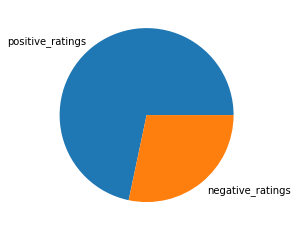

In [5]:
# visualize average rating when a game is either single or multiplayer
multirating = [0,0]
singlerating = [0,0]
bothrating = [0,0]
for index, row in steamdata.iterrows():
    if "Multi-player" in row['categories'] and "Single-player" in row['categories']:
      # += one entry
      bothrating[0] += 1
      # += percent of positive ratings on entry
      bothrating[1] += row['positive_ratings'] / (row['positive_ratings'] + row['negative_ratings'])
    elif "Multi-player" in row['categories']:
      multirating[0] += 1
      multirating[1] += row['positive_ratings'] / (row['positive_ratings'] + row['negative_ratings'])
    elif "Single-player" in row['categories']:
      singlerating[0] += 1
      singlerating[1] += row['positive_ratings'] / (row['positive_ratings'] + row['negative_ratings'])

#calculate percentage
singletemp = [singlerating[1] / singlerating[0], 1 - singlerating[1] / singlerating[0]]
multitemp = [multirating[1] / multirating[0], 1 - multirating[1] / multirating[0]]
bothtemp = [bothrating[1] / bothrating[0], 1 - bothrating[1] / bothrating[0]]

labels = ["positive_ratings", "negative_ratings"]
#plot bothrating piechart
plt.pie(bothtemp, labels = labels)
plt.show()

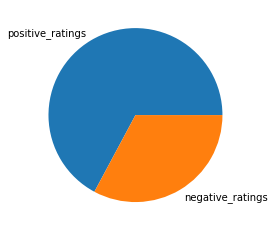

In [6]:
#multiplayer games ratings
plt.pie(multitemp, labels = labels)
plt.show()

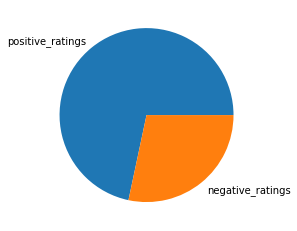

In [7]:
#singleplayer games rating
plt.pie(singletemp, labels = labels)
plt.show()

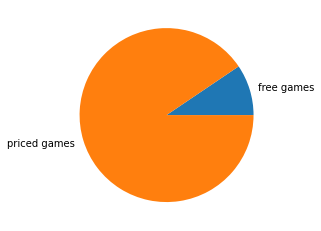

In [8]:
#how many games are free
total = len(steamdata)
free = 0
for index, row in steamdata.iterrows():
  if row['price'] == 0:
    free += 1
percentag = [free/total, 1 - free/total]
plt.pie(percentag, labels = ['free games', 'priced games'])
plt.show()

achievements              9821
average_playtime           0.0
name                LOGistICAL
Name: 12604, dtype: object
achievements                                  0
average_playtime                        3177.08
name                The Abbey of Crime Extensum
Name: 9201, dtype: object


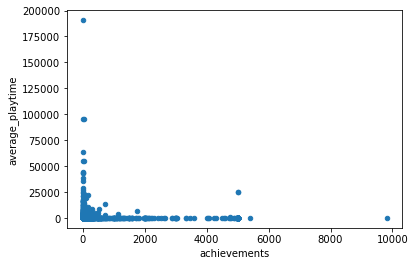

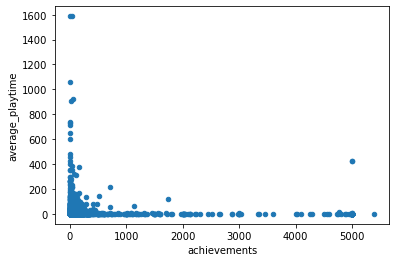

In [9]:
ax1 = steamdata.plot.scatter(x='achievements',y='average_playtime')
achdf = pd.DataFrame()
achdf['achievements'] = steamdata['achievements']
achdf = achdf.join(steamdata['average_playtime'])
achdf['average_playtime'] = achdf['average_playtime'].div(60).round(2)
achdf = achdf.join(steamdata['name'])
print(achdf.loc[achdf['achievements'].idxmax()])
print(achdf.loc[achdf['average_playtime'].idxmax()])
achdf = achdf.drop(achdf['achievements'].idxmax())
achdf = achdf.drop(achdf['average_playtime'].idxmax())
ax2 = achdf.plot.scatter(x='achievements',y='average_playtime')

In [10]:
modeldf = steamdata['steamspy_tags'].str.get_dummies(';')
modeldf = modeldf.join(steamdata['achievements'])
modeldf = modeldf.join(steamdata['owners'].str.get_dummies())
modeldf = modeldf.join(steamdata['average_playtime'])
modeldf = modeldf.join(steamdata['name'])
modeldf = sklearn.utils.shuffle(modeldf, random_state=40)

# Mille põhjal ennustada
tunnused = []
for col in modeldf.columns:
  tunnused.append(col)
tunnused.remove('average_playtime')
tunnused.remove('name')
# Mida ennustada
ennustatav = 'average_playtime'

train, test = train_test_split(modeldf)
X_train = train[tunnused]
y_train = train[ennustatav]

X_test = test[tunnused]
y_test = test[ennustatav]

from sklearn.tree import DecisionTreeClassifier

mudel = DecisionTreeClassifier()
mudel.fit(X_train, y_train)
y_pred = mudel.predict(X_train)
print("Täpsus treeninghulgal:",accuracy_score(y_train,y_pred))

y_pred = mudel.predict(X_test)

Täpsus treeninghulgal: 0.9496700482615975


In [11]:
print("õige\tennustatud")
print()
for paar in list(zip(y_test,y_pred, test['name'])):
    print(paar[0],"\t",paar[1], "\t", paar[2])
print("Täpsus testhulgal:",accuracy_score(y_test,y_pred))

õige	ennustatud

0 	 0 	 Neko Dungeon 喵酱迷城 喵醬迷城 ねこダンジョン
0 	 0 	 STONE
0 	 0 	 Draw Light
0 	 0 	 乌鸦 - Crows
0 	 0 	 I was rebuilt
63 	 1055 	 Resident Evil 7 / Biohazard 7 Teaser: Beginning Hour
0 	 0 	 TRIZEAL Remix
252 	 0 	 Livelock
224 	 209 	 Fly O'Clock
469 	 1200 	 Total War: MEDIEVAL II – Definitive Edition
0 	 0 	 Power of The Void
0 	 0 	 The Witchcraft of Skysword - 天翔と剣のウィッチクラフト
0 	 0 	 Monster Truck Drive
161 	 0 	 Age of Wonders
0 	 0 	 Kingdom of the Dragon
0 	 0 	 Train Station Simulator
0 	 0 	 Shards of Eradine
0 	 0 	 BAJA: Edge of Control HD
0 	 0 	 The Waste Land
125 	 1286 	 Waveform
408 	 1234 	 Borderlands Game of the Year Enhanced
0 	 0 	 Fairspace
0 	 0 	 Elium - Prison Escape
0 	 0 	 Ultra Off-Road 2019: Alaska
276 	 0 	 Cubicle Quest
0 	 0 	 Trivia Vault: Video Game Trivia Deluxe
0 	 0 	 Final Rush
17 	 0 	 Empires Apart
174 	 564 	 Blackguards
0 	 0 	 Storm of Jigsaw Puzzles
0 	 0 	 Tower Behind the Moon
0 	 0 	 Dafen Oil Painting Village: An Immersive Real

0 	 0 	 Awakening: The Redleaf Forest Collector's Edition
0 	 9 	 Rocket Wars
0 	 0 	 Dynamite Bunny: Catch The Carrot
383 	 401 	 Legend (1994)
0 	 0 	 Yerah
0 	 0 	 Ziro
369 	 141 	 STAR WARS™ Republic Commando™
0 	 0 	 In Darkness
0 	 0 	 Won't You Be My Laser?
515 	 82 	 Samorost 3
0 	 0 	 Anark.io
0 	 0 	 Ilamentia
0 	 0 	 Downhill Deceits
0 	 0 	 CyberClub-2077
1 	 0 	 Spaceguy
157 	 629 	 Shelter 2
0 	 0 	 Twinship
0 	 0 	 Ecchi Cards
0 	 0 	 Fish Tycoon
0 	 0 	 Test your knowledge: Cats
505 	 0 	 Hexagon Defense
0 	 0 	 Surface: Return to Another World Collector's Edition
0 	 0 	 Star Balls
0 	 0 	 Poseidon - Project Dark Sky
0 	 1 	 Premier Buggy Racing Tour
0 	 0 	 Don't Make Love
168 	 0 	 UNDER NIGHT IN-BIRTH Exe:Late[st]
10 	 19 	 Return NULL - Episode 1
807 	 478 	 Game Dev Tycoon
0 	 0 	 Sit on bottle
0 	 0 	 Chinese Souls-Hua Garden/华夏园
0 	 0 	 TILE
0 	 0 	 长天 Long Sky
0 	 0 	 Demon's Rise - Lords of Chaos
0 	 301 	 Might & Magic® Heroes® VII
0 	 0 	 The Wolf's Bite
0 	

915 	 315 	 EARTH DEFENSE FORCE 4.1 The Shadow of New Despair
0 	 4435 	 Investigator
0 	 0 	 Samurai of Hyuga
0 	 0 	 東周列萌志 Philosophic Love
0 	 0 	 RFLEX
0 	 0 	 Spellbind
0 	 0 	 War of Rights
0 	 0 	 Ships 2017
117 	 141 	 Pacify
0 	 0 	 Roadworks - The Simulation
0 	 0 	 CuVRball
0 	 0 	 Faux
0 	 0 	 The Archetype
0 	 0 	 Life of a Mobster
0 	 0 	 Secret Santa
0 	 0 	 Gaben Kingdom
0 	 0 	 Endless Fun The battle for peanuts
0 	 0 	 Header Goal VR: Being Axel Rix
0 	 0 	 Temple of Pizza
1505 	 95 	 Democracy 3 Africa
0 	 0 	 Shout Of Survival
0 	 43074 	 Home Design 3D
0 	 0 	 GACHIMUCHI M♂NLY PUZZLE
243 	 64 	 HIVESWAP: Act 1
0 	 0 	 OnSpace
0 	 0 	 Clergyman
0 	 0 	 My Vet Practice
381 	 0 	 Construct: Escape the System
0 	 0 	 This Strange Realm Of Mine
0 	 0 	 Buzz Aldrin: Cycling Pathways to Mars
0 	 0 	 Derelict Fleet
0 	 0 	 aMAZE Valentine
0 	 0 	 Frozen Drift Race (Restocked)
0 	 0 	 Avenging Angel
0 	 0 	 Pulut Adventure
301 	 389 	 F.E.A.R. 2: Project Origin
0 	 0 	 ROAD

0 	 0 	 Big Day
0 	 0 	 Doctor Who Infinity
0 	 0 	 Hyperide VR
636 	 0 	 SimpleRockets
0 	 0 	 The ORPHEUS Ruse
0 	 0 	 Zia and the goddesses of magic
0 	 0 	 ALIEN FIELD
0 	 0 	 Max: The Curse of Brotherhood
0 	 0 	 Dreamwalker: Never Fall Asleep
0 	 0 	 SodaCity
723 	 596 	 LEGO® Worlds
0 	 0 	 King Erik
2514 	 1055 	 Star Trek Online
1100 	 0 	 HEARTBEAT
0 	 0 	 Starship Traveller
0 	 0 	 Mr. Sweet
0 	 0 	 The Wizards Who Fell In A Hole
0 	 0 	 Brath: Brain and Math
0 	 0 	 Shadow Corridor
408 	 204 	 I Am Alive
1 	 0 	 Zombie Pop
31 	 130 	 8BitMMO
0 	 0 	 FLASHOUT 2
0 	 0 	 P·O·L·L·E·N
0 	 0 	 Choice of Alexandria
0 	 0 	 Mayhem ZX
1610 	 1277 	 Fallen Enchantress: Legendary Heroes
0 	 0 	 FallenCore
11517 	 1824 	 Medieval Engineers
0 	 0 	 Sayonara Umihara Kawase
0 	 0 	 RŌA
0 	 0 	 THE LAST HUNT
352 	 424 	 Westerado: Double Barreled
0 	 0 	 Cherry in the Sky
0 	 0 	 Delivery man simulator
0 	 0 	 Dungeon's Barrage
999 	 348 	 Awesomenauts - the 2D moba
0 	 204 	 Inside My Rad

0 	 0 	 Poggers
0 	 0 	 Driftpunk Racer
0 	 0 	 QLORB 2
0 	 0 	 Super Alpaca Bros.
639 	 74 	 The Clans - Saga of the Twins
0 	 0 	 Beat Ninja
0 	 0 	 Time Machine VR
0 	 0 	 Math Classroom Challenge
0 	 0 	 The Bard's Tale Trilogy
0 	 0 	 Digital Domain’s Monkey King™
0 	 0 	 Mars Troopers - 生化奇兵2019
0 	 0 	 AereA
0 	 0 	 Photon Rush
0 	 0 	 Sable's Grimoire
0 	 0 	 Vegetable couple
0 	 0 	 Galactic Shipwright
0 	 0 	 Ouroboros: Prelude
0 	 9 	 Ecchi Girls
0 	 0 	 AntiPodal
0 	 0 	 Prophecy I - The Viking Child
99 	 484 	 Plane Mechanic Simulator
0 	 0 	 The last Baron's stunt (Anime)
0 	 0 	 Fort
2106 	 7089 	 Kingdom Come: Deliverance
0 	 0 	 Pirate Hell
0 	 0 	 Monsterplants vs Bowling - Arcade Edition
0 	 0 	 Card Games Mega Collection
0 	 0 	 I ♥ You!
72 	 10 	 Destination Sol
0 	 0 	 Seraph
0 	 0 	 Bizango Blast
0 	 0 	 VR Kanojo / VRカノジョ
0 	 0 	 Zimbo
0 	 0 	 Monster Energy Supercross - The Official Videogame 2
0 	 0 	 Galaxy Cannon Rider
0 	 0 	 Stophat
0 	 0 	 Flatshot
0 	 0 

211 	 202 	 Dynamic Very, Very, Hard game!!
0 	 0 	 Molten Armor
0 	 0 	 Magicmaker
0 	 0 	 BattleQuiz
0 	 0 	 Vacation Adventures: Park Ranger
0 	 0 	 Dream UniVRse
0 	 0 	 Chill
0 	 489 	 Shock Tactics
222 	 0 	 Super Animal Royale
0 	 0 	 The Black Knight
0 	 0 	 Shape of America: Episode One
0 	 0 	 Beachhead 2002
0 	 0 	 Fantasy Quest Solitaire
0 	 0 	 Frequent Flyer
0 	 0 	 Ball laB
0 	 0 	 Age of Fear 3: The Legend
309 	 0 	 Rogue'n Roll
0 	 0 	 Megamagic: Wizards of the Neon Age
0 	 0 	 Keep Balance VR
329 	 0 	 Snik
0 	 0 	 PONCHO
0 	 0 	 AEGIS 2186
0 	 0 	 Hidden Object - 12 in 1 bundle
0 	 0 	 Skill Master VR -- Learn Meditation
0 	 0 	 Card Crawl
0 	 237 	 Tidalis
0 	 0 	 FlickSync - Mad Hatter VR
427 	 0 	 Astrox: Hostile Space Excavation
0 	 0 	 88 Heroes
0 	 0 	 Ball run and rush
1135 	 1307 	 The Elder Scrolls III: Morrowind® Game of the Year Edition
0 	 0 	 Flying Turkey
5 	 0 	 Time Leap Paradise SUPER LIVE!
0 	 0 	 Snow Games VR
0 	 0 	 Lanterns
0 	 0 	 Aya's Journey

0 	 0 	 Hawks Tactical
0 	 349 	 The Far Frontier
0 	 0 	 NEStalgia
0 	 92 	 Blocks by Google
0 	 0 	 Out of Ammo: Death Drive
264 	 0 	 Robo Do It
0 	 0 	 Mr. Dubstep
0 	 0 	 Sandbox Showdown
0 	 0 	 State of Mind
0 	 0 	 Mecha-Tokyo Rush
0 	 0 	 RealmCraft
505 	 564 	 Shadowrun: Dragonfall - Director's Cut
0 	 0 	 Dungeon Girl
0 	 0 	 Days of War
0 	 19 	 Etherlords II
0 	 0 	 Stickman Backflip Killer zone
0 	 0 	 Pixel bomb! bomb!!
0 	 0 	 Day of the Trumplings
0 	 0 	 ZEscape
0 	 0 	 Grisaia Phantom Trigger Vol.1
0 	 0 	 Space Overlords
0 	 0 	 Woody Blox
0 	 0 	 Northern Regime
210 	 183 	 Introvert Quest
0 	 0 	 Stellar Tactics
0 	 0 	 Guided Meditation VR
0 	 0 	 One Night Stand
0 	 0 	 Riding Club Championships
0 	 0 	 RGBverse
0 	 0 	 Anicon - Animal Complex - Cat's Path
0 	 0 	 Line Of Defense Tactics - Tactical Advantage
0 	 0 	 Barren Roads
217 	 0 	 Story of a Cube
317 	 116 	 Alien Rage - Unlimited
0 	 0 	 WARP-TEK
0 	 0 	 Cute Hedgehog
0 	 0 	 Code51:Mecha Arena
0 	 0 	 

0 	 8 	 Critical Mass
0 	 0 	 Astroe
0 	 0 	 King of Retail
0 	 0 	 Combat Racers
0 	 4 	 Mortal Royale
0 	 0 	 Force of Elements
29 	 0 	 Expelled
0 	 0 	 VR Aquarium -雅-
0 	 0 	 All Aspect Warfare
0 	 0 	 Radiant Defense
17 	 0 	 Forged Battalion
22 	 36 	 Kingdoms Rise
0 	 0 	 Mind OVR Matter
1024 	 19 	 MX vs. ATV Reflex
0 	 0 	 Top Trumps Turbo
103 	 67 	 Injustice™ 2
0 	 0 	 Loot'N Shoot
0 	 0 	 Kolumno
0 	 0 	 Infect and Destroy
0 	 0 	 Defenders of Tetsoidea Academy
0 	 0 	 Uplands Motel: VR Thriller
0 	 0 	 Snowmania
0 	 0 	 Catacombs of the Undercity
0 	 0 	 Police Adventure
0 	 0 	 When the Darkness comes
0 	 0 	 Starman
0 	 0 	 Unnamed Fiasco
0 	 0 	 Gamble Fight Plus
0 	 0 	 Space Shaft
4420 	 3 	 Picross Touch
0 	 0 	 Bomsy
0 	 0 	 Grompula
342 	 440 	 Kingdom Rush Frontiers
0 	 75 	 Skyreach
0 	 0 	 Mad Sector
145 	 114 	 Absolute Drift
0 	 0 	 Christmas Carol
0 	 0 	 Edge of Twilight – Return To Glory
0 	 0 	 Zombie Teacher
0 	 0 	 Super Star Path
0 	 0 	 Quest for the 

0 	 0 	 PIPE by BMX Streets
0 	 0 	 RAW FOOTAGE
0 	 0 	 Godly Corp
399 	 0 	 Dark Project
0 	 0 	 Basketball Pro Management 2015
2418 	 2485 	 The Elder Scrolls V: Skyrim Special Edition
0 	 0 	 SPACE BLASTER 8 BIT
0 	 0 	 Empire
765 	 979 	 Twilight Struggle
0 	 0 	 Thick Light 2
91 	 1595 	 >observer_
0 	 0 	 Disney Infinity 3.0: Gold Edition
0 	 0 	 The Legend of Bean
0 	 0 	 Warrior Kings
1 	 0 	 Epic Battle Fantasy 3
0 	 0 	 DEFENDER OF EARTH VS THE ALIEN ARMADA
0 	 0 	 Bitworm
0 	 0 	 Rocket Knight
0 	 0 	 Dega Madness
54 	 0 	 AR-K
61 	 0 	 MagiCats Builder (Crazy Dreamz)
0 	 48 	 BIT.TRIP FLUX
0 	 0 	 Deck of Ashes
0 	 0 	 Entwined: Strings of Deception
0 	 0 	 Mr.Jezko
384 	 400 	 Z.I.O.N.
0 	 0 	 Maxi Pool Masters VR
0 	 0 	 League of Light: Silent Mountain Collector's Edition
0 	 0 	 Nancy Drew®: Message in a Haunted Mansion
301 	 290 	 Sumo Revise
0 	 0 	 ToaZZle
0 	 0 	 You Shall Not Jump: PC Master Race Edition
0 	 0 	 枕边少女 MOE Hypnotist - share dreams with you
0 	 0 	 Fa

0 	 0 	 Dreadnought Sol
0 	 0 	 Land of Puzzles: Knights
0 	 0 	 3DF Zephyr Lite Steam Edition
0 	 0 	 Tile Typer
0 	 0 	 SAMURAI WARRIORS: Spirit of Sanada
0 	 0 	 King Of Dirt
0 	 0 	 Ghost Cleaner
0 	 0 	 Save the Universe, Please!
0 	 0 	 Alienzix
0 	 0 	 Artillery Cats
0 	 0 	 My Safe House
0 	 0 	 Breakout Invaders
0 	 0 	 PackageRun
83 	 331 	 GameGuru
1969 	 493 	 S.T.A.L.K.E.R.: Call of Pripyat
0 	 0 	 Darwin's Test
0 	 0 	 Deep GachiGASM
0 	 0 	 Over My Dead Pixel
0 	 0 	 Draft Day Sports: College Basketball 2018
0 	 0 	 Gevaudan
0 	 0 	 Intro Maker
0 	 0 	 -KLAUS-
0 	 0 	 Bone: Out From Boneville
0 	 0 	 Dragon Simulator Multiplayer
95 	 2191 	 Of Guards And Thieves
0 	 0 	 Xtreme League
9352 	 826 	 Rust
273 	 105 	 The Last Error
645 	 600 	 Prototype™
0 	 0 	 Fantasy Mosaics 24: Deserted Island
0 	 0 	 Human-powered spacecraft
0 	 0 	 Hangeki
0 	 0 	 SOULS
0 	 157 	 Circle Empires
0 	 0 	 Bowling at the Lake
0 	 0 	 Tales of Wedding Rings VR
0 	 0 	 Devouring Stars
0 	 0 

0 	 0 	 Matchville - Match 3 Puzzle
0 	 0 	 aMAZE Classic
0 	 80 	 Rexodus: A VR Story Experience
0 	 0 	 Artillery Globe
0 	 0 	 222 Hearts
0 	 0 	 Shortest Trip to Earth
0 	 0 	 Terminal Hacker
0 	 0 	 Aveyond 3-3: The Lost Orb
418 	 237 	 Trials Fusion™
0 	 0 	 Ground Runner: Trials
412 	 1932 	 Risen 3 - Titan Lords
0 	 0 	 Coconut Queen
593 	 0 	 King's Bounty: Warriors of the North
0 	 0 	 Depraved
0 	 0 	 Soccertron
0 	 0 	 Cranks and Goggles
0 	 0 	 The Wisbey Mystery
0 	 0 	 Newt's Voyage
0 	 0 	 Runaway, The Dream of The Turtle
0 	 0 	 System Goose Overload
0 	 0 	 Wave of Darkness
0 	 0 	 Alien Mayhem
0 	 0 	 Superior Wizards
0 	 0 	 A Verdant Hue
0 	 0 	 Fantasy World
0 	 0 	 Quible Sphere
0 	 0 	 Lock's Quest
0 	 0 	 Fancy Skiing VR
0 	 0 	 Rope Racer O'Neon
0 	 1034 	 CHRONO TRIGGER®
0 	 0 	 胜利即正义! / Victory is justice！
0 	 0 	 EXE: Mainframe
0 	 0 	 Lords of the Realm III
0 	 0 	 Lootfest Wars
0 	 0 	 Heart of Moon : The Mask of Seasons
1 	 0 	 Once on a windswept night


0 	 0 	 Voxel Tanks
0 	 0 	 The Rising of the Rose Ocelot
0 	 0 	 Slime Jumper
0 	 0 	 Next
0 	 0 	 Stratus: Battle For The Sky
0 	 0 	 Alphabeats: Master Edition
0 	 0 	 Isolated
0 	 0 	 Fos
0 	 0 	 Hokan: Monster Slayer
0 	 0 	 Soul-Ivy: C0
0 	 0 	 Taima Miko Yuugi
0 	 0 	 Heroes Of Hellas 4: Birth Of Legend
327 	 289 	 The Last Patient
0 	 0 	 Rapid Fire
0 	 0 	 Insectophobia : Episode 1
0 	 0 	 Semispheres
0 	 0 	 Marbledrome: Crazy Stunt Balls
423 	 67 	 Primal Carnage
0 	 0 	 Solar System
0 	 306 	 Weird Worlds: Return to Infinite Space
0 	 0 	 Thin Judgment
0 	 275 	 Skeet: VR Target Shooting
0 	 0 	 Katharsis
0 	 0 	 International Affairs
0 	 0 	 Dinosaurus Life VR
15 	 229 	 Zero Reflex : Black Eye Edition
0 	 0 	 Space Rangers: Quest
0 	 0 	 SpellShokked!
0 	 0 	 Quixzel Rush Halloween Party
0 	 0 	 Isolation
0 	 0 	 Fantasy of Eden
45 	 0 	 Hover
0 	 0 	 Joyo Kanji Quiz
484 	 1307 	 Two Worlds Epic Edition
0 	 0 	 Lawnmower Game 2: Drifter
0 	 0 	 Epic Manager - Create Your 

0 	 0 	 Cosmic Kites
0 	 0 	 Clad in Iron: Gulf of Mexico 1864
0 	 0 	 Rytmik Lite Chiptune Synthesizer
0 	 0 	 Saga of the Void: Admirals
0 	 0 	 Light of the Mountain
0 	 0 	 Code 7: A Story-Driven Hacking Adventure
0 	 0 	 Fine China
637 	 0 	 Half Minute Hero: The Second Coming
168 	 238 	 Whispering Willows
0 	 0 	 Waste Cleaner
0 	 0 	 Pipe Push Paradise
0 	 0 	 Snails
0 	 0 	 Monstrous
0 	 0 	 Spotter
0 	 0 	 Darkest of Days
0 	 0 	 Hollow
0 	 0 	 B画少说
0 	 0 	 Numgeon
1121 	 319 	 Darkest Dungeon®
0 	 0 	 My Free Farm 2
0 	 0 	 Depression The Game
1006 	 533 	 Dead Cells
0 	 0 	 Lonely in the Winter
0 	 0 	 Cloudrift
0 	 0 	 aMAZE Frozen
0 	 0 	 Orbit - Playing with Gravity
0 	 0 	 Farm Frenzy 2
160 	 246 	 Foreign Legion: Buckets of Blood
0 	 0 	 Solar System Journey VR
0 	 0 	 MonsterxMan: Inheritence To Lust
7 	 18 	 Clown House (Palyaço Evi)
0 	 0 	 Crossroad Mysteries: The Broken Deal
23 	 0 	 BallisticNG
0 	 0 	 Koropokkur in Love ~A Little Fairy’s Tale~
0 	 0 	 Hybrid Ani

56 	 82 	 King's Quest
301 	 0 	 idleBeer
0 	 0 	 Renegade Grounds: Episode 1
0 	 0 	 GyroCube VR
0 	 0 	 Whispered Secrets: The Story of Tideville Collector's Edition
0 	 0 	 JigsawMania
0 	 0 	 Gone with the Demon
0 	 0 	 Topdown Showdown
0 	 0 	 PIRATADO 1
0 	 0 	 Time of Fury
341 	 0 	 Dustwind
0 	 269 	 We Are The Dwarves
0 	 0 	 Swords and Sandals Pirates
0 	 0 	 Bomb Squad Academy
0 	 0 	 Off The Record: Liberty Stone Collector's Edition
0 	 0 	 Hardway Party
0 	 0 	 C-RUSH
0 	 0 	 RXE
0 	 0 	 Starship Rubicon
0 	 0 	 Snake Classic
0 	 0 	 Rosenkreuzstilette Freudenstachel
0 	 0 	 Gravity Spin
0 	 0 	 Biotoxin: The Dark Days
0 	 0 	 Dragon Awaken
0 	 0 	 Sounds of Talent: Kpop Adventure
0 	 0 	 Trip to Vinelands
0 	 0 	 BLEAK: Welcome to Glimmer
0 	 0 	 Stone In Galaxy
0 	 0 	 Outside
0 	 180 	 Syndrome VR
0 	 0 	 Fear For Freedom
0 	 0 	 Danny's War
0 	 0 	 异种战争少女 Alien War Girl
0 	 0 	 Psy High
0 	 0 	 After Rain: Phoenix Rise
0 	 0 	 Ragtag Adventurers
0 	 0 	 Alien League
0 

0 	 0 	 Iffy Institute
719 	 0 	 Root Double -Before Crime * After Days- Xtend Edition
0 	 0 	 Mad Carnage
117 	 371 	 Alien Swarm: Reactive Drop
0 	 0 	 The Neon Boy
0 	 0 	 Toonstruck
0 	 0 	 Mob War
0 	 0 	 Trenchfoot
0 	 0 	 Helldorado
0 	 0 	 Rescue Bear Operation
0 	 0 	 SnarfQuest Tales
0 	 0 	 Shogo: Mobile Armor Division
0 	 0 	 Mage Fort
80 	 0 	 Takedown: Red Sabre
0 	 0 	 The Ballad Singer
0 	 0 	 RAYBEEM - Live in Your Music
553 	 301 	 Knights of Pen and Paper 2
0 	 0 	 Fight for Gold II
0 	 0 	 Dark Fear
0 	 0 	 Myths Of Orion: Light From The North
0 	 0 	 魔王村长和杂货店-Hero Village Simulator
0 	 0 	 Saboteur!
0 	 0 	 Swing the cat
0 	 0 	 Z69
0 	 0 	 Corto Maltese - Secrets of Venice
0 	 0 	 Jet Set Knights
304 	 0 	 Coffence
0 	 0 	 Atomic Reconstruction
0 	 0 	 Monsters and Medicine
0 	 0 	 Super Bomberman R
0 	 0 	 Degrees of Separation
0 	 0 	 Sword Art Online: Lost Song
0 	 0 	 Royal Gems
0 	 0 	 Past Cure
0 	 0 	 Bounty Hunter: Stampede
0 	 0 	 KINGDOMS
0 	 0 	 Police 

0 	 0 	 Treasure At The Top
0 	 0 	 Survival Tycoon™
0 	 0 	 Startide
0 	 0 	 Tenebrous Dungeon
0 	 0 	 Island Racer
0 	 0 	 Snowball Rush
147 	 261 	 Summer Sale
0 	 249 	 Spellforge
0 	 0 	 Recreational Dreaming
0 	 0 	 Happy Critters
0 	 372 	 Watching Grass Grow In VR - The Game
0 	 0 	 Eruption
272 	 245 	 Cuties
0 	 0 	 MEMENTO
0 	 0 	 Venusian Vengeance
0 	 0 	 Screamer 2
0 	 0 	 John:Condemned
0 	 0 	 Chocolate
0 	 0 	 Evil Robot Traffic Jam HD
0 	 0 	 Runbow
10 	 0 	 Woodlands
0 	 0 	 Lady's Hentai Mosaic
0 	 0 	 The Raiders
0 	 0 	 Space Fighter
0 	 0 	 Road Rage
0 	 0 	 No Clue VR
0 	 0 	 MANIC MINERS
0 	 0 	 Mad Farm VR
0 	 691 	 Flute Master
0 	 0 	 Roll Out
4377 	 1164 	 Farming Simulator 17
88 	 0 	 Simutrans
0 	 0 	 Domain Defense
198 	 533 	 This Is the Police
0 	 0 	 Plight
160 	 301 	 DOKA 2 KISHKI EDITION
0 	 0 	 Dwarflings
0 	 0 	 Ripple Effect
0 	 0 	 Romance of the Three Kingdoms Ⅲ / 三國志Ⅲ
0 	 0 	 Moonstrider
0 	 0 	 Solitaire VR
508 	 807 	 Grand Theft Auto: Epis

0 	 0 	 Electronic Piano
0 	 0 	 Quarantine Circular
0 	 0 	 Your Smile Beyond Twilight:黄昏下的月台上
0 	 0 	 Cows VS Vikings
247 	 0 	 Nightork Adventures - Beyond the Moons of Shadalee
0 	 0 	 Bloonz Toonz
0 	 0 	 Flurius
161 	 120 	 Line of Sight
0 	 0 	 Dots Pop : Sexy Hentai Girls
0 	 0 	 Demigods
0 	 338 	 Conquest of Elysium 3
0 	 0 	 Hover Junkers
0 	 0 	 While you are Downloading
0 	 0 	 Shadows of Kurgansk
200 	 274 	 Reigns: Her Majesty
0 	 0 	 Tetripank
1 	 17 	 The Average Everyday Adventures of Samantha Browne
0 	 0 	 Enola
234 	 17 	 Primordia
0 	 0 	 Techwars Online
0 	 0 	 Apperception
0 	 0 	 Obduction
0 	 0 	 Cypress Inheritance: The Beginning
0 	 0 	 HotHead
0 	 0 	 Samurai of Hyuga Book 3
174 	 94 	 Castle
0 	 0 	 Boss 101
0 	 0 	 夜雪冰娇
0 	 0 	 Hypersensitive Bob
0 	 0 	 Avernum 5
0 	 0 	 Let There Be Life
0 	 0 	 Sticks And Bones
26 	 0 	 Virtual Sports
0 	 0 	 Love, Guitars, and the Nashville Skyline
133 	 0 	 Space Hulk: Deathwing - Enhanced Edition
0 	 0 	 DreamDesk V

0 	 0 	 Better Late Than DEAD
3 	 0 	 HoCWar
0 	 0 	 Wyv and Keep: The Temple of the Lost Idol
0 	 0 	 qop 4
0 	 0 	 Moon Pool
229 	 0 	 12 Labours of Hercules II: The Cretan Bull
0 	 0 	 Forbidden Clicker Party
104 	 162 	 Bloodsports.TV
0 	 0 	 Take Command - 2nd Manassas
0 	 0 	 Cat Inside
0 	 0 	 Element4l
116 	 13 	 Last Day of June
0 	 0 	 Gachi Gang
0 	 0 	 House Dating VR: Cute Korean Girl, Sehyun
1 	 0 	 BoxesWithGuns
0 	 0 	 Cartoonway : Mini Cars
0 	 0 	 CURSE
0 	 74 	 Deep Sky Derelicts
0 	 0 	 GlobalMap Astro
0 	 0 	 Clock Simulator
0 	 0 	 Disney's Treasure Planet: Battle of Procyon
0 	 0 	 Ley Lines
0 	 0 	 The President
0 	 0 	 Pantropy
0 	 0 	 Cheesecake Cool Conrad
7 	 55 	 Animal Rivals
2 	 0 	 Disney's Aladdin
0 	 0 	 TimeShift™
647 	 222 	 Big Pharma
0 	 0 	 INTERPOINT
0 	 0 	 Dead Moon - Revenge on Phobos -
0 	 117 	 868-HACK
0 	 0 	 Disco Time 80s VR
0 	 0 	 Spaceforce Rogue Universe HD
0 	 0 	 Mining & Tunneling Simulator
0 	 0 	 Lost
78 	 0 	 RoboBlitz
0 	 0 	 